In [327]:
import pandas as pd
import numpy as np

In [328]:
df = pd.read_csv('Supermarket_customers.csv', sep='\\t', skipinitialspace=True)


/var/folders/bw/j1mzmp5d4mq10mpq2_gf8qy00000gn/T/ipykernel_43050/1680851075.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('Supermarket_customers.csv', sep='\\t', skipinitialspace=True)


In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Out of almost 12,000 web visits, 9150 pruchases were made.

Generally the website is doing it works.

In [336]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [424]:
# Creating a dataset for the spendings

mnt_1 = [col for col in df.columns if 'Mnt' in col]
mnt = df.loc[:, mnt_1]
mnt['mnt_sum']= mnt['MntWines']+mnt['MntFruits']+mnt['MntMeatProducts']+mnt['MntFishProducts']+mnt['MntSweetProducts']+mnt['MntGoldProds']
mnt.head()
df['mnt_sum'] = mnt['mnt_sum']

In [414]:
# Creating Age column in the main dataset

df['age'] = 2024 - df['Year_Birth']

In [416]:
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

The majority 

What is 2n Cycle?
We can look at the 

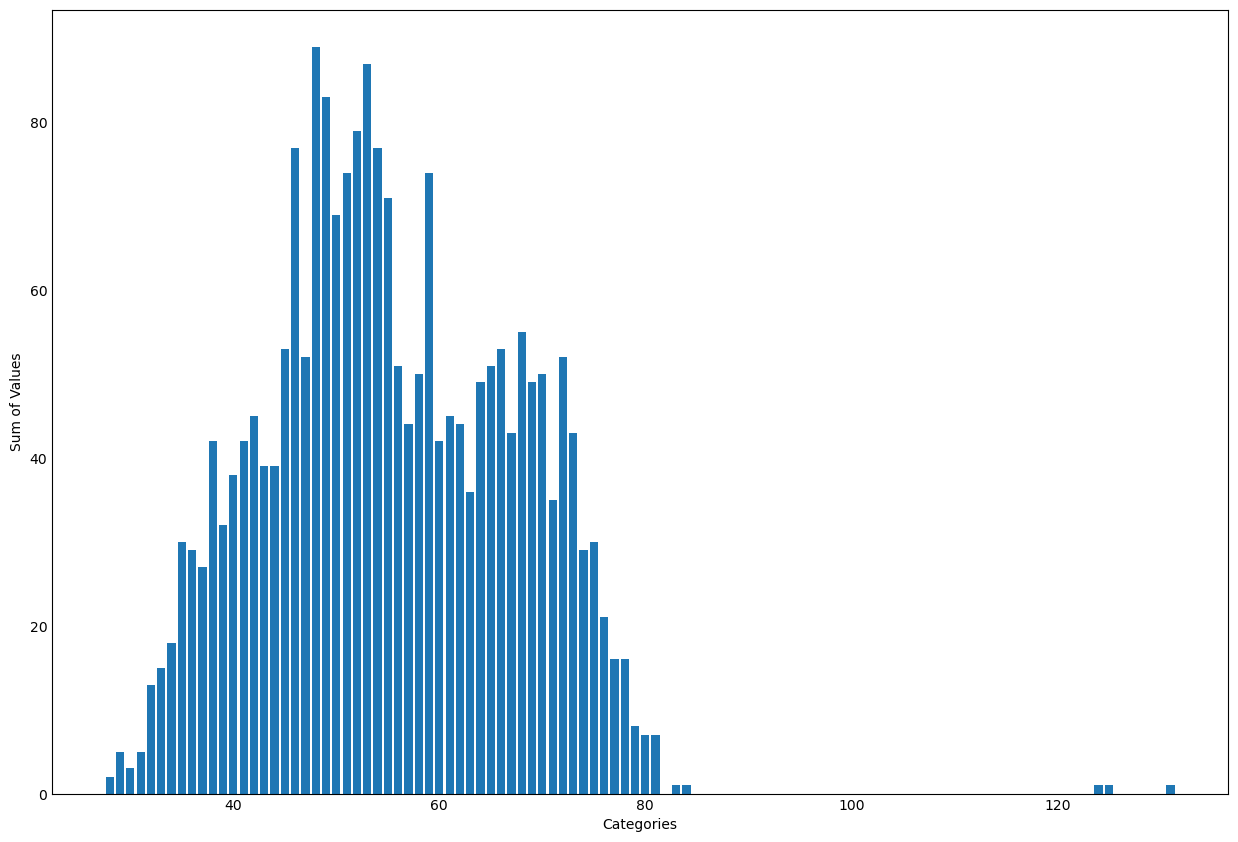

In [369]:
plt.bar(df['age'].value_counts().index, df['age'].value_counts().values)
plt.rcParams["figure.figsize"] = (12, 8)

plt.xlabel('Categories')
plt.ylabel('Sum of Values')
plt.title('')
plt.show()

In [383]:
print(f' Mean Age is {df['age'].mean():.2f}')

 Mean Age is 55.19


In [373]:
print(f' Median Age is {df['age'].median()}')

 Median Age is 54.0


In [432]:
above_60 = df[df['age'] >= 60]
above_60_profit = above_60['mnt_sum'].sum()
print(f'Profit for people above 60 is {above_60_profit/1000:.2f} thousands')
print(f'Number of customers above 60 are {len(above_60)}')
print(f'{(len(above_60) / len(df))*100:.2f}% of the database')

Profit for people above 60 is 558.19 thousands
Number of customers above 60 are 786
35.09% of the database


In [436]:
under_40 = df[df['age'] <= 40]
under_40_profit = under_40['mnt_sum'].sum()
print(f'Profit for people under 40 is {under_40_profit/1000:.2f} thousands')
print(f'Number of customers under 40 are {len(under_40)}')
print(f'{(len(under_40) / len(df))*100:.2f}% of the database')

Profit for people under 40 is 149.44 thousands
Number of customers under 40 are 259
11.56% of the database


In [445]:
btwn_40_60 = df[df['age'].between(41, 59)]
btwn_40_60_profit= btwn_40_60['mnt_sum'].sum()
print(f'Profit for people between 40 and 60 is {btwn_40_60_profit/1000:.2f} thousands')
print(f'Number of customers between 40 and 60 are {len(btwn_40_60)}')
print(f'{(len(btwn_40_60) / len(df))*100:.2f}% Of the data base')

Profit for people between 40 and 60 is 649.35 thousands
Number of customers between 40 and 60 are 1195
53.35% Of the data base


### Average age is 55 years old.

- Under 40 are         259 -->  11.5%
  profit 149.44 thousands --> 11%
- Btween 40 and 60 are 1195 -->  53.35%
  profit 649.35 thousands --> 47.8%
- Above 60 are         786  -->  35.0%
  profit 558.19 thousands --> 41.1%

So this is an older customer so we have to keep this in mind. **Not scaleable maybe**

### Spendings and profit

We will go through the each catigory and check for

In [387]:
mnt.describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875
std,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000
50%,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000
75%,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000
max,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000


The highest profitable category is Wines at 680816


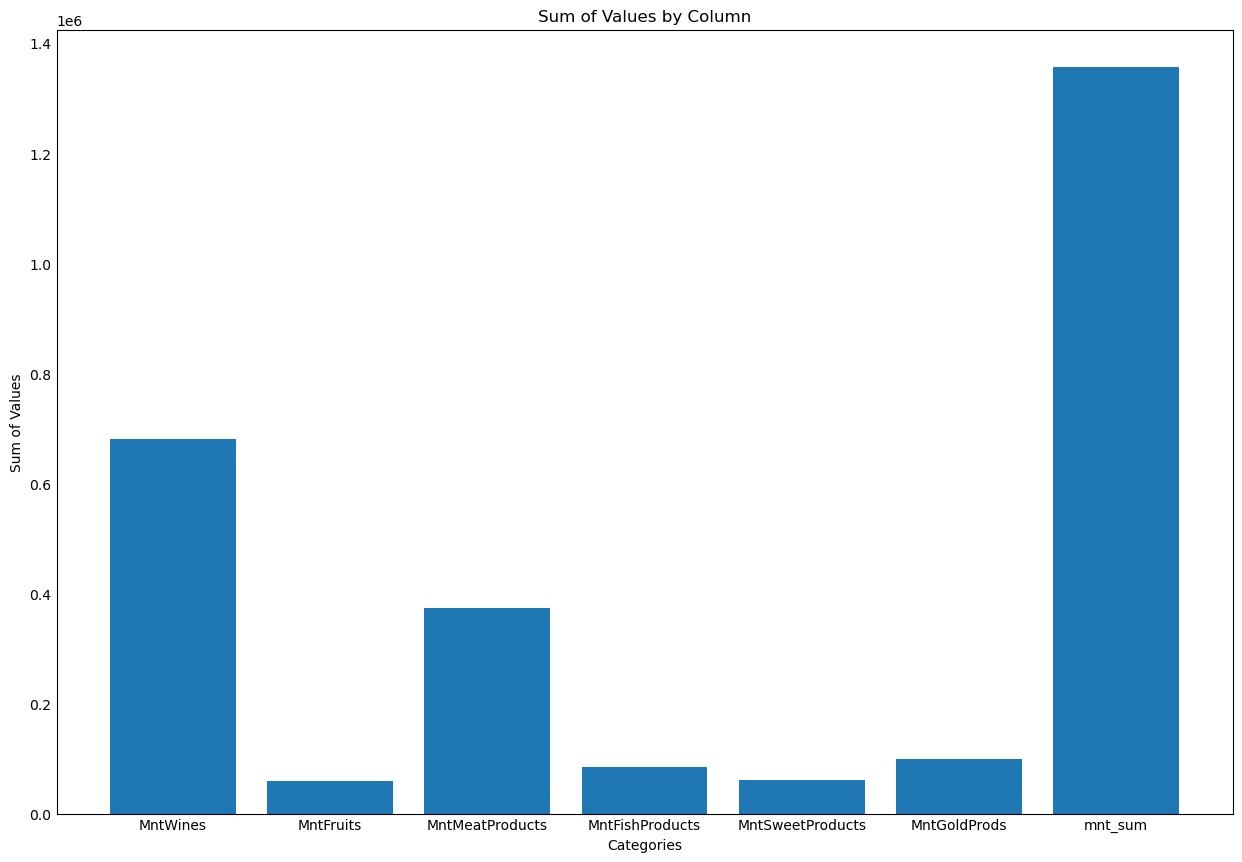

In [391]:
mnt_sums = mnt.sum()


plt.bar(mnt_sums.index, mnt_sums.values)
plt.rcParams["figure.figsize"] = (12, 8)

plt.xlabel('Categories')
plt.ylabel('Sum of Values')
plt.title('Sum of Values by Column')
print(f'The highest profitable category is Wines at {mnt_sums['MntWines']}')
plt.show()

In [393]:
print(f'The highest profitable category is Wines at {mnt_sums['MntWines']/1000:0.0f} thousands in two years')
print(f'The second most profitable catergory is Meat {mnt_sums['MntMeatProducts']/1000:0.0f} thousands in two years')
print(f'As for the total profit for this customer group is {mnt_sums['mnt_sum']/1000:0.0f} thousands')

The highest profitable category is Wines at 681 thousands in two years
The second most profitable catergory is Meat 374 thousands in two years
As for the total profit for this customer group is 1357 thousands


In [395]:
wines_prc = (mnt_sums['MntWines']/mnt_sums['mnt_sum'])*100
print(f'Wines is {wines_prc:.2f} %')


Wines is 50.17 %


In [397]:
wines_prc = (mnt_sums['MntMeatProducts']/mnt_sums['mnt_sum'])*100
print(f'Meat Products is {wines_prc:.2f} %')


Meat Products is 27.56 %


Index(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'mnt_sum'],
      dtype='object') [ 680816   58917  373968   84057   60621   98609 1356988]


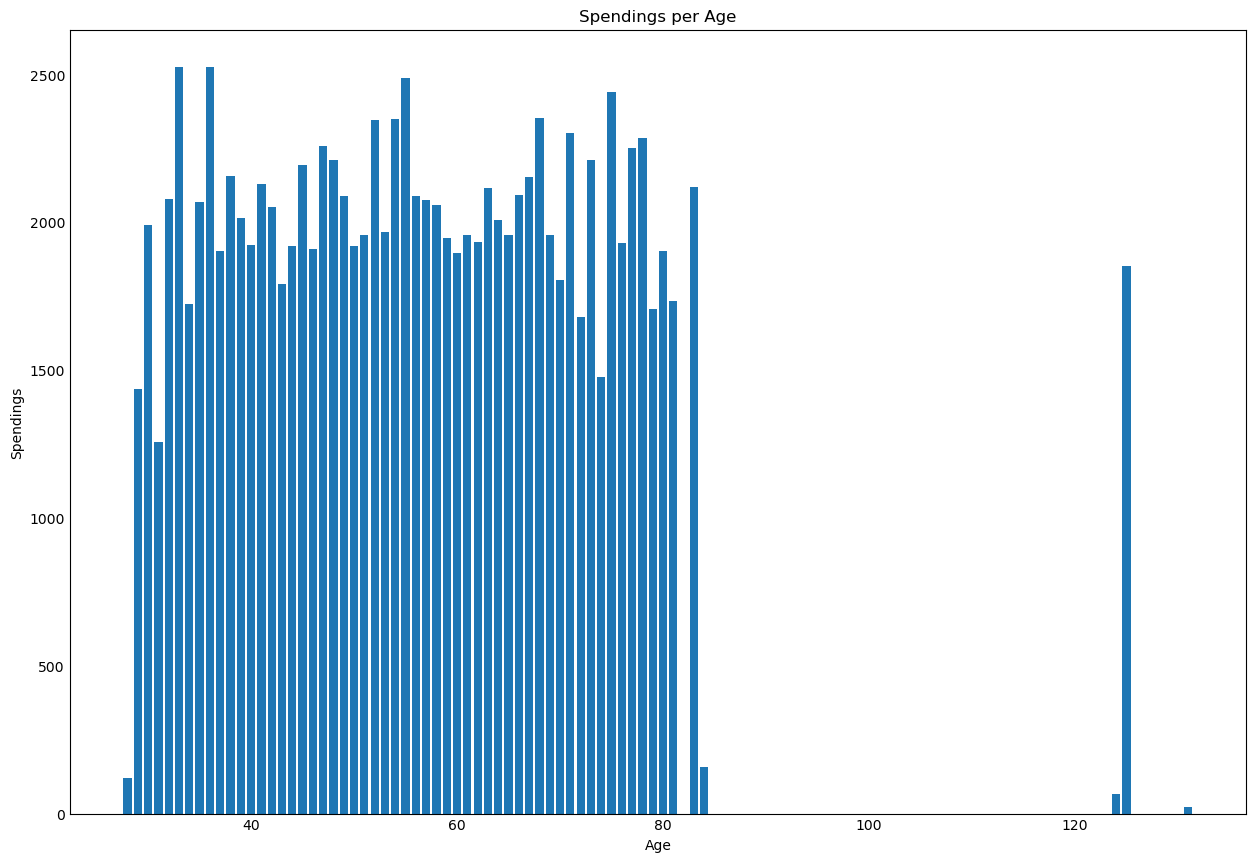

In [399]:
plt.bar(df['age'], mnt['mnt_sum'].values)
plt.rcParams["figure.figsize"] = (12, 8)

plt.xlabel('Age')
plt.ylabel('Spendings')
plt.title('Spendings per Age')
print(mnt_sums.index, mnt_sums.values)
plt.show()

### Spendings / Age distrbuation
It seems the spending is equally ditrbuted through the different age groups.

We have 3 outliers for Age. These people seem to be over 120 years old which is nonsense.

I will be dropping these people.

Index(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'mnt_sum'],
      dtype='object') [ 680816   58917  373968   84057   60621   98609 1356988]


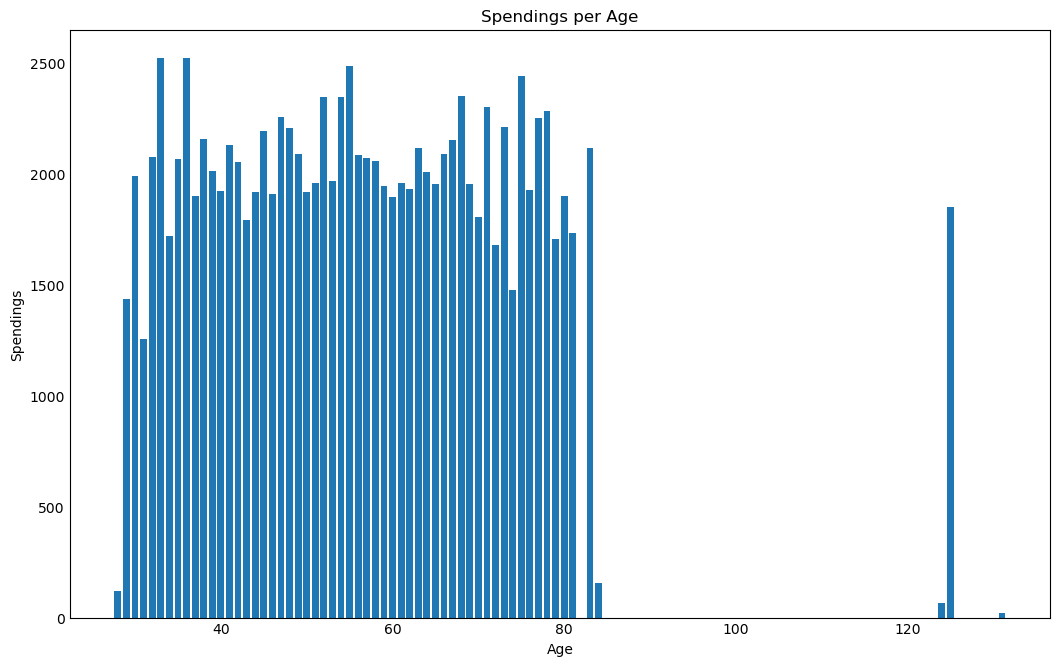

In [635]:
plt.bar(df['age'], mnt['mnt_sum'].values)
plt.rcParams["figure.figsize"] = (6, 4)

plt.xlabel('Age')
plt.ylabel('Spendings')
plt.title('Spendings per Age')
print(mnt_sums.index, mnt_sums.values)
plt.show()

In [ ]:
wrong_age_indices = df[df['age'] > 100].index
df.drop(wrong_age_indices, inplace=True)


In [ ]:
df.info()

In [ ]:
Num_columns = [col for col in df.columns if 'Num' in col]
num = df.loc[:, Num_columns]
num.head()
num= num.drop('NumWebVisitsMonth', axis=1)

In [ ]:
num_sum = num.sum()

colors = ['blue'] * len(num_sum)

plt.bar(num_sum.index, num_sum.values)
plt.rcParams["figure.figsize"] = (12, 8)

plt.xlabel('Categories')
plt.ylabel('Sum of Values')
plt.title('Sum of Values by Column')
print(num_sum.index, num_sum.values)
plt.show()

In [ ]:
num.head()

### df['Label'] = np.where((df['AcceptedCmp3']+df['AcceptedCmp2']+df['AcceptedCmp1']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']) >= 3, 1, 0)

In [ ]:
df['Response'].value_counts()

In [451]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,mnt_sum
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,55.194196,605.798214
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.984069,602.249288
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,28.000000,5.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,47.000000,68.750000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,54.000000,396.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,65.000000,1045.500000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,131.000000,2525.000000


We will be reducing the education to numeric feature (maybe 10 = Basic, 12 = 2n cycle, etc)

We will be reducing the status to either together or single
 

- Trial 1: Customer info + buying habits (Mnt columns)
- Trial2: Customer info + purchases channels (not Web visits)
- Trials 3: buying habits + purchases channels


In [457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [473]:
columns_to_drop = ['ID','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Z_CostContact', 'Z_Revenue','Response','Dt_Customer','Year_Birth']
X = df.drop(columns=columns_to_drop)


In [549]:
mnt_clusters = ['NumWebVisitsMonth','NumStorePurchases','NumCatalogPurchases','NumWebPurchases','NumDealsPurchases']
X_mnt = X.drop(columns=mnt_clusters)
X_mnt_scaled = scaler.fit_transform(X_mnt)


In [551]:
X_mnt_scaled

array([[ 0.23532677, -0.82521765, -0.92989438, ..., -0.59109863,
        -0.18867619, -0.02989406],
       [-0.23582624,  1.03255877,  0.90693402, ..., -0.59109863,
        -0.18867619, -0.02989406],
       [ 0.77363327, -0.82521765, -0.92989438, ...,  1.69176504,
        -0.18867619, -0.02989406],
       ...,
       [ 0.18910632, -0.82521765, -0.92989438, ..., -0.59109863,
        -0.18867619, -0.02989406],
       [ 0.67903514, -0.82521765,  0.90693402, ...,  1.69176504,
        -0.18867619, -0.02989406],
       [ 0.02483795,  1.03255877,  0.90693402, ..., -0.59109863,
        -0.18867619, -0.02989406]])

In [479]:
X = pd.get_dummies(X)

In [507]:
mean_income = X['Income'].mean()
X['Income'].fillna(mean_income,inplace=True)


/var/folders/bw/j1mzmp5d4mq10mpq2_gf8qy00000gn/T/ipykernel_43050/4085385645.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Income'].fillna(mean_income,inplace=True)


In [509]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2240 non-null   float64
 1   Kidhome                  2240 non-null   int64  
 2   Teenhome                 2240 non-null   int64  
 3   Recency                  2240 non-null   int64  
 4   MntWines                 2240 non-null   int64  
 5   MntFruits                2240 non-null   int64  
 6   MntMeatProducts          2240 non-null   int64  
 7   MntFishProducts          2240 non-null   int64  
 8   MntSweetProducts         2240 non-null   int64  
 9   MntGoldProds             2240 non-null   int64  
 10  NumDealsPurchases        2240 non-null   int64  
 11  NumWebPurchases          2240 non-null   int64  
 12  NumCatalogPurchases      2240 non-null   int64  
 13  NumStorePurchases        2240 non-null   int64  
 14  NumWebVisitsMonth       

In [519]:
X.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,58138.0,0,0,58,635,88,546,172,88,88,...,False,False,False,False,False,False,True,False,False,False
1,46344.0,1,1,38,11,1,6,2,1,6,...,False,False,False,False,False,False,True,False,False,False
2,71613.0,0,0,26,426,49,127,111,21,42,...,False,False,False,False,False,False,False,True,False,False
3,26646.0,1,0,26,11,4,20,10,3,5,...,False,False,False,False,False,False,False,True,False,False
4,58293.0,1,0,94,173,43,118,46,27,15,...,False,True,False,False,False,True,False,False,False,False


In [521]:
X_scaled

array([[ 0.23532677, -0.82521765, -0.92989438, ..., -0.59109863,
        -0.18867619, -0.02989406],
       [-0.23582624,  1.03255877,  0.90693402, ..., -0.59109863,
        -0.18867619, -0.02989406],
       [ 0.77363327, -0.82521765, -0.92989438, ...,  1.69176504,
        -0.18867619, -0.02989406],
       ...,
       [ 0.18910632, -0.82521765, -0.92989438, ..., -0.59109863,
        -0.18867619, -0.02989406],
       [ 0.67903514, -0.82521765,  0.90693402, ...,  1.69176504,
        -0.18867619, -0.02989406],
       [ 0.02483795,  1.03255877,  0.90693402, ..., -0.59109863,
        -0.18867619, -0.02989406]])

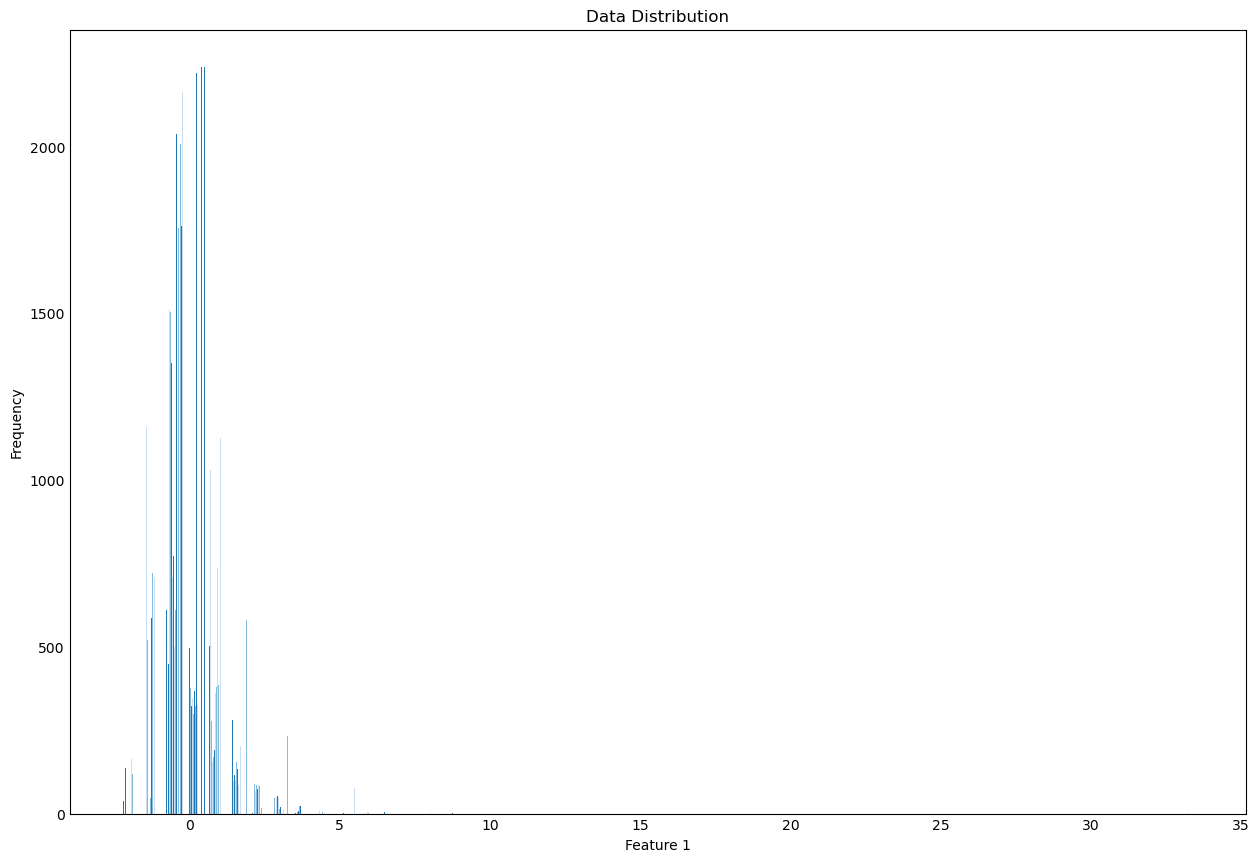

In [535]:
import matplotlib.pyplot as plt

plt.hist(X_scaled, bins=50)
plt.xlabel('Feature 1')
plt.ylabel('Frequency')
plt.title('Data Distribution')
plt.show()

In [621]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Assuming your dataset is in a Pandas dataframe called 'df'

# Select the columns you want to use for clustering
features = X

# Create a DBSCAN model with epsilon=0.5 and min_samples=5
dbscan = DBSCAN(eps=1, min_samples=20)

# Fit the model to your data
dbscan.fit(X_mnt_scaled)

# Get the cluster labels
labels = dbscan.labels_

# Get the number of clusters
n_clusters = len(set(labels))

print(f"Number of clusters: {n_clusters}") 

Number of clusters: 3


In [637]:
from sklearn.metrics import silhouette_score

# Create a KMeans model with 5 clusters
kmeans = KMeans(n_clusters=5)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.labels_

# Calculate the Silhouette Score
silhouette = silhouette_score(X, labels)

print("Silhouette Score:", silhouette)

Silhouette Score: 0.521862656317472


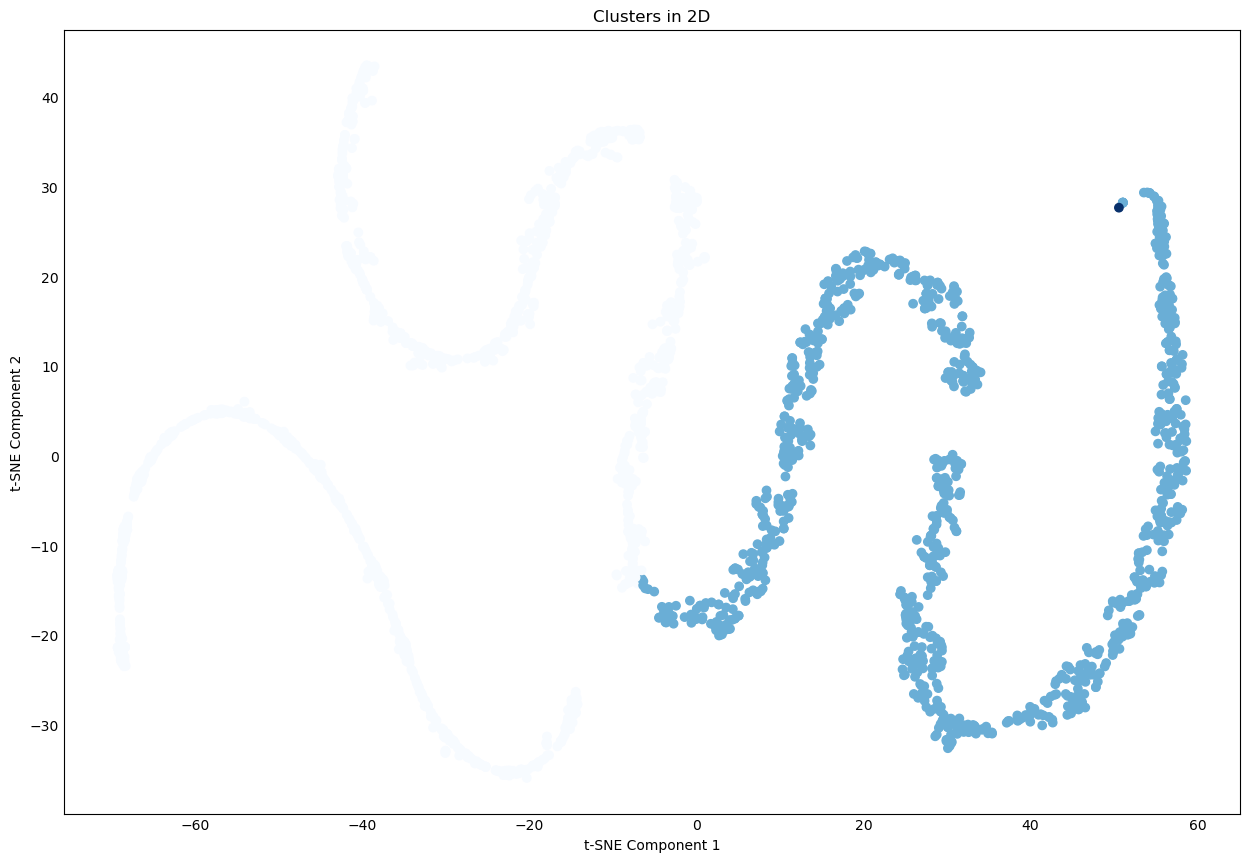

In [629]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Create a t-SNE instance with 2 components
tsne = TSNE(n_components=2)

# Fit and transform the data
X_tsne = tsne.fit_transform(X)

# Create a scatter plot of the clusters
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Clusters in 2D')
plt.show()

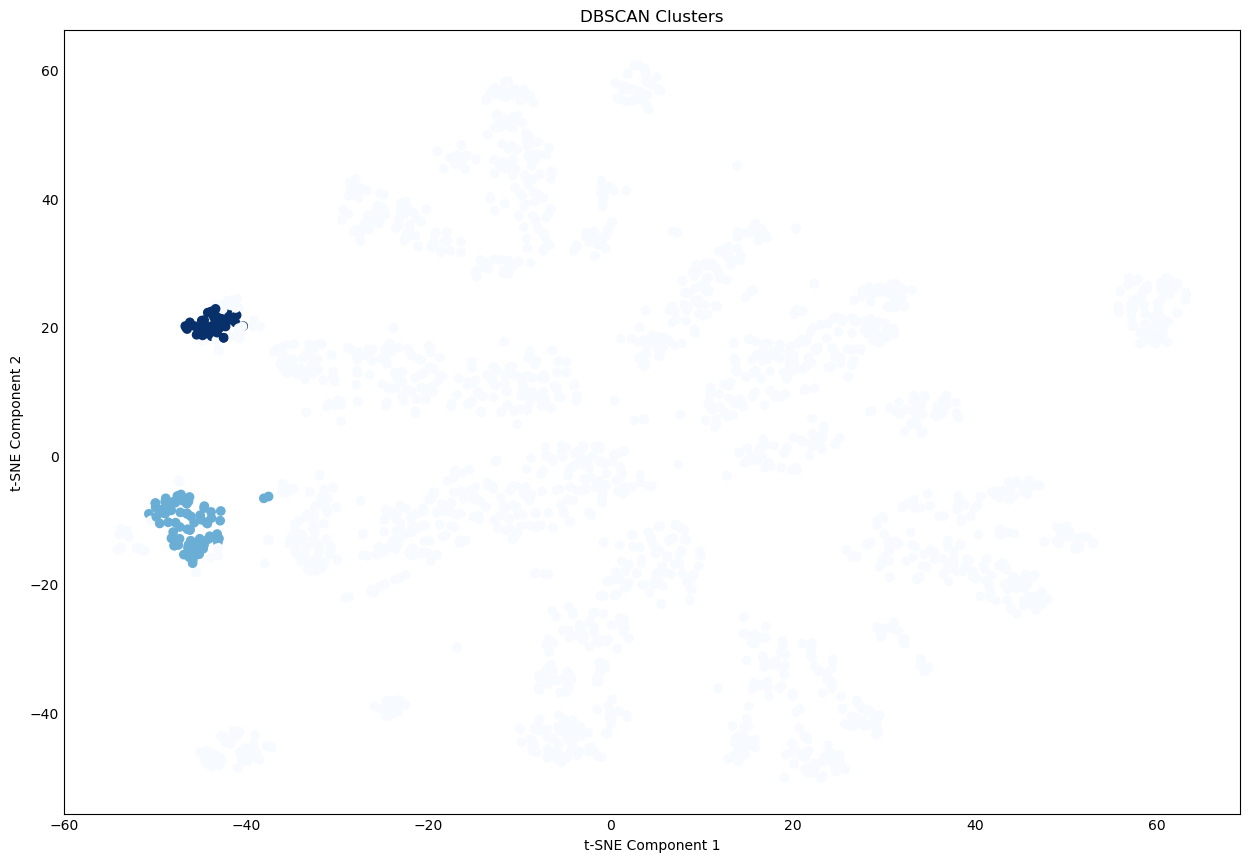

In [631]:
from sklearn.manifold import TSNE

# Reduce the dimensionality of the data to 2 features using t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled)

# Get the cluster labels from the DBSCAN model
labels = dbscan.labels_

# Create a scatter plot of the clusters
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('DBSCAN Clusters')
plt.show()

In [ ]:
plt.plot(df['Income']>= 80000)
plt.show()

In [ ]:
plt.plot(df['Income']>= 80000)
plt.show()

In [ ]:
df['NumWebPurchases'].mean()

In [ ]:
df['NumCatalogPurchases'].mean()

In [ ]:
df['NumStorePurchases'].mean()

In [ ]:
df['NumWebVisitsMonth'].mean()

In [ ]:
plt.plot(df['Complain'])
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(y=df['Complain'])
plt.show()

In [ ]:
sns.violinplot(x=df['income'])
plt.show()

In [ ]:
plt.plot(df['Marital_Status'])
xMSplt = df['Marital_Status']
yMSplt= df['Marital_Status'].value_counts()
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery-nogrid')

# make data: correlated + noise
np.random.seed(1)
x = np.random.randn(5000)
y = 1.2 * x + np.random.randn(5000) / 3

# plot:
fig, ax = plt.subplots()

ax.hist2d(x, y, bins=(np.arange(-3, 3, 0.1), np.arange(-3, 3, 0.1)))

ax.set(xlim=(-2, 2), ylim=(-3, 3))

plt.show()

In [ ]:
df['NumWebVisitsMonth'].value_counts()